In [117]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Consecutive positives


If today market opening is postive what is the probaility that yesterday was positive
In another terms if market today is postive what is the probability that tomorrow opening will be positive

In [118]:
#workks for data downloaded from bse
column_list = ["date", "open", "high","low","close","reamrks"]

years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2007-2020"]
for s in years:
    path="data/sensex/sensex"+s+".csv"
    df = pd.read_csv(path,names=column_list)
    
    count1=0
    count2=0
    cur=1
    for i in range(2,df.index.size-1):  
        if df['close'][i-2]<df['open'][i-1] and df['close'][i-1]<df['open'][i]:
            count1=count1+1
        if df['close'][i-1]<df['open'][i]:
            count2=count2+1
            profit=float((float(df['open'][i+1])-float(df['close'][i]))/float(df['close'][i]))
            cur=cur+(cur*profit)
    print("for the year "+s)
   # print(str(count1)+" "+str(count2))
    #print((count1/count2)*100)
    print("return is "+ str(cur))
    print("\n")

for the year 2010
return is 1.080519324812772


for the year 2011
return is 1.252700425757263


for the year 2012
return is 1.2375100286060414


for the year 2013
return is 1.190990569630977


for the year 2014
return is 1.334376252091945


for the year 2015
return is 1.4256564983041118


for the year 2016
return is 1.2467851138024666


for the year 2017
return is 1.4246601285150406


for the year 2018
return is 1.252700425757263


for the year 2019
return is 1.2375100286060414


for the year 2020
return is 1.2948030031996671


for the year 2007-2020
return is 23.262420257531936




In [119]:
#In previous cell we have checked for sensex now let us check for nifty 50
column_list = ["Date", "Open", "High","Low","Close"]
#data will be used for concatenation of data frames
data=pd.DataFrame()

years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for s in years:
    path="data/nifty/nifty"+s+".csv"
    df = pd.read_csv(path,usecols=column_list) 
    df=df.rename(columns={"Open": "Open Price", "High": "High Price","Close":"Close Price","Low":"Low Price"})
    data=data.append(df,ignore_index = True)
    count1=0
    count2=0
    cur=1
    for i in range(2,df.index.size-1):  
        if df['Close Price'][i-2]<df['Open Price'][i-1] and df['Close Price'][i-1]<df['Open Price'][i]:
            count1=count1+1
        if df['Close Price'][i-1]<df['Open Price'][i]:
            count2=count2+1
            profit=float((float(df['Open Price'][i+1])-float(df['Close Price'][i]))/float(df['Close Price'][i]))
            #brokerage of zero and 0.1% stt
            cur=cur+(cur*profit)
    print("for the year "+s)
   # print(str(count1)+" "+str(count2))
   # print((count1/count2)*100)
    print("return is "+ str(cur))
    print("\n")

for the year 2010
return is 1.1183115468001632


for the year 2011
return is 1.0614283486137817


for the year 2012
return is 1.0614283486137817


for the year 2013
return is 1.0614283486137817


for the year 2014
return is 1.0614283486137817


for the year 2015
return is 1.0614283486137817


for the year 2016
return is 1.1700440446708427


for the year 2017
return is 1.3805472085989194


for the year 2018
return is 1.13405007179551


for the year 2019
return is 1.3587752715693584


for the year 2020
return is 1.1931870871262211




In [120]:
#merged data for 11 years
print(data)

             Date  Open Price  High Price  Low Price  Close Price
0     04-Jan-2010     5200.90     5238.45    5167.10      5232.20
1     05-Jan-2010     5277.15     5288.35    5242.40      5277.90
2     06-Jan-2010     5278.15     5310.85    5260.05      5281.80
3     07-Jan-2010     5281.80     5302.55    5244.75      5263.10
4     08-Jan-2010     5264.25     5276.75    5234.70      5244.75
...           ...         ...         ...        ...          ...
2719  23-Dec-2020    13473.50    13619.45   13432.20     13601.10
2720  24-Dec-2020    13672.15    13771.75   13626.90     13749.25
2721  28-Dec-2020    13815.15    13885.30   13811.55     13873.20
2722  29-Dec-2020    13910.35    13967.60   13859.90     13932.60
2723  30-Dec-2020    13980.90    13997.00   13864.95     13981.95

[2724 rows x 5 columns]


In [121]:
#checking same pattern for nifty bees an ETF which tracks nifty fifty along with brokerage and taxes

In [122]:
#column list for data downloaded from NSE

column_list = ["Date", "Open Price", "High Price","Low Price","Close Price"]
#avoiding 2019 because there is 1:10 split in decmenber of that year
years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2020"]
for s in years:
    path="data/niftybees/niftybees"+s+".csv"
    df = pd.read_csv(path,usecols=column_list) 
   
    count1=0
    count2=0
    cur=1
    for i in range(2,df.index.size-1):  
        if df['Close Price'][i-2]<df['Open Price'][i-1] and df['Close Price'][i-1]<df['Open Price'][i]:
            count1=count1+1
        if df['Close Price'][i-1]<df['Open Price'][i]:
            count2=count2+1
            profit=float((float(df['Open Price'][i+1])-float(df['Close Price'][i]))/float(df['Close Price'][i]))
            #brokerage of zero and 0.1% stt
            cur=cur+(cur*profit-0.0021)
    print("for the year "+s)
   # print(str(count1)+" "+str(count2))
    #print((count1/count2)*100)
    print("return is "+ str(cur))
    print("\n")

for the year 2010
return is 0.6890462279966767


for the year 2011
return is 0.8709880614137901


for the year 2012
return is 0.7097993527982762


for the year 2013
return is 0.7106549920933082


for the year 2014
return is 0.7988077232547004


for the year 2015
return is 0.8153926814751435


for the year 2016
return is 0.7344985733556818


for the year 2017
return is 1.0683826622162367


for the year 2018
return is 0.8636374783095928


for the year 2020
return is 28.291801269670362




In [123]:
#column list for data downloaded from NSE

column_list = ["Date", "Open Price", "High Price","Low Price","Close Price","Average Price"]
#avoiding 2019 because there is 1:10 split in decmenber of that year
years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2020"]
for s in years:
    path="data/niftybees/niftybees"+s+".csv"
    df = pd.read_csv(path,usecols=column_list) 
    count1=0
    count2=0
    cur=1
    for i in range(2,df.index.size-1):  
        if df['Close Price'][i-2]<df['Open Price'][i-1] and df['Close Price'][i-1]<df['Open Price'][i]:
            count1=count1+1
        if df['Close Price'][i-1]<df['Open Price'][i]:
            count2=count2+1
            profit=float((float(df['Average Price'][i+1])-float(df['Close Price'][i]))/float(df['Close Price'][i]))
            #brokerage of zero and 0.1% stt
            cur=cur+(cur*profit-0.0021)
    print("for the year "+s)
   # print(str(count1)+" "+str(count2))
   # print((count1/count2)*100)
    print("return is "+ str(cur))
    print("\n")

for the year 2010
return is 0.7539263356116217


for the year 2011
return is 0.610451243086082


for the year 2012
return is 0.7021769007460783


for the year 2013
return is 0.8122310408526091


for the year 2014
return is 0.9660276384972649


for the year 2015
return is 0.785713459618766


for the year 2016
return is 0.7272885618941907


for the year 2017
return is 0.7609657499593453


for the year 2018
return is 0.7302255061662177


for the year 2020
return is 0.5684256622711104




# Streaks

In [124]:
#entry in list is 0 if tomorrow open negative 1 if tomorrow opens positive

df=data
li=[]
print(data)
positives=0
negatives=0
for i in range(0,df.index.size-1):  
        if df['Open Price'][i+1]>df['Close Price'][i]:
            li.append(1)
            positives=positives+1
        else:
            li.append(0)
            negatives=negatives+1
print("positives in data set are "+ str(positives) +" and negatives are "+ str(negatives) )
print(positives/(positives+negatives))
today=[]
today.append(1)
cur=0;
streak=[1]
for i in range(1,df.index.size-1):  
        if df['Open Price'][i]>df['Close Price'][i-1]:
            today.append(1)
            if(today[i-1]==1):
                streak.append(streak[i-1]+1)
            else:
                streak.append(1)
        else:
            today.append(0)
            if(today[i-1]==0):
                streak.append(streak[i-1]+1)
            else:
                streak.append(1)


             Date  Open Price  High Price  Low Price  Close Price
0     04-Jan-2010     5200.90     5238.45    5167.10      5232.20
1     05-Jan-2010     5277.15     5288.35    5242.40      5277.90
2     06-Jan-2010     5278.15     5310.85    5260.05      5281.80
3     07-Jan-2010     5281.80     5302.55    5244.75      5263.10
4     08-Jan-2010     5264.25     5276.75    5234.70      5244.75
...           ...         ...         ...        ...          ...
2719  23-Dec-2020    13473.50    13619.45   13432.20     13601.10
2720  24-Dec-2020    13672.15    13771.75   13626.90     13749.25
2721  28-Dec-2020    13815.15    13885.30   13811.55     13873.20
2722  29-Dec-2020    13910.35    13967.60   13859.90     13932.60
2723  30-Dec-2020    13980.90    13997.00   13864.95     13981.95

[2724 rows x 5 columns]
positives in data set are 1727 and negatives are 996
0.6342269555637164


In [125]:
#dropping last row
df.drop(df.tail(1).index,inplace=True) # drop last n rows

In [126]:
df['day'] = df.index
df['result']=li
df['today']=today
df['streak']=streak

In [127]:
df

,Date,Open Price,High Price,Low Price,Close Price,day,result,today,streak
0,04-Jan-2010,5200.90,5238.45,5167.10,5232.20,0,1,1,1
1,05-Jan-2010,5277.15,5288.35,5242.40,5277.90,1,1,1,2
2,06-Jan-2010,5278.15,5310.85,5260.05,5281.80,2,0,1,3
3,07-Jan-2010,5281.80,5302.55,5244.75,5263.10,3,1,0,1
4,08-Jan-2010,5264.25,5276.75,5234.70,5244.75,4,1,1,1
...,...,...,...,...,...,...,...,...,...
2718,22-Dec-2020,13373.65,13492.05,13192.90,13466.30,2718,1,1,1
2719,23-Dec-2020,13473.50,13619.45,13432.20,13601.10,2719,1,1,2
2720,24-Dec-2020,13672.15,13771.75,13626.90,13749.25,2720,1,1,3
2721,28-Dec-2020,13815.15,13885.30,13811.55,13873.20,2721,1,1,4


# Graphical illustration

In [128]:

positiveStreak={}
negativeStreak={}
for i in range(0,len(streak)-1):
    if(streak[i+1]<=streak[i]):
        if(today[i]==1):
            positiveStreak[streak[i]]=positiveStreak.get(streak[i],0)+1
        else:
            negativeStreak[streak[i]]=negativeStreak.get(streak[i],0)+1
        


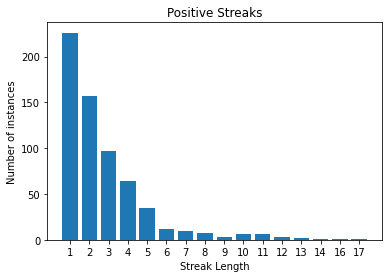

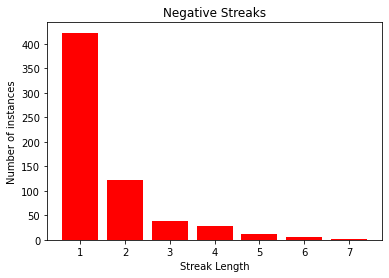

In [129]:
#sorting dict by key to get proper graph
#positiveStreak=sorted (positiveStreak.keys())
sorted_ps={}
sorted_keys = sorted(positiveStreak.keys())  # [1, 3, 2]
for w in sorted_keys:
    sorted_ps[w] = positiveStreak[w]
positiveStreak=sorted_ps
names = list(positiveStreak.keys())
values = list(positiveStreak.values())

plt.bar(range(len(positiveStreak)), values, tick_label=names)
plt.title("Positive Streaks")
plt.xlabel("Streak Length")
plt.ylabel("Number of instances")
plt.show()
#print(positiveStreak)

sorted_ns={}
sorted_keys = sorted(negativeStreak.keys())  # [1, 3, 2]
for w in sorted_keys:
    sorted_ns[w] = negativeStreak[w]
negativeStreak=sorted_ns
names = list(negativeStreak.keys())
values = list(negativeStreak.values())

plt.bar(range(len(negativeStreak)), values, tick_label=names,color='red')
plt.title("Negative Streaks")
plt.xlabel("Streak Length")
plt.ylabel("Number of instances")
plt.show()


# Logistic regression

In [130]:
X = df[['today','streak']]
y = df['result']  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #train is based on 75% of the dataset, test is based on 25% of dataset

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print(y_pred)

Accuracy: 0.6167400881057269


# Decison Tree

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#print(y_pred)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.618208516886931


# SVM

In [133]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto'))])
y_pred = clf.predict(X_test)
#print(y_pred)

In [134]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6167400881057269
